# The Data

# Introduction

**Description:**
The dataset I decided to look at is called "UFO Sightings" and includes over 80,000 records of UFO sightings around the world.  This dataset includes the UFO's shape, the location of the sighting including the coordinates/country/state, the duration of the sighting, and the time of the sighting.

**Link:**
https://corgis-edu.github.io/corgis/datasets/csv/ufo_sightings/ufo_sightings.csv

**Motivation:**
My motivation for looking at this data is because I have an interest in conspiracy theories and extraterrestial beings and I would like to figure out whether there are patterns behind UFO sightings and what these patterns could mean.

**Questions:**
* Is there a pattern among the most common times and location of UFO sightings?
* Is there a common theme with the locations that have the most common UFO sightings?
* Does the duration of the UFO sighting play an important role?
* Do these patterns imply that these UFO sightings can be credible or debunked?
* How have UFO sightings changed over time?

# Methods

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk

In [4]:
import requests
response=requests.get('https://corgis-edu.github.io/corgis/datasets/csv/ufo_sightings/ufo_sightings.csv')
response

<Response [200]>

**Data Summary:**
The dataset includes the shape of the UFO, the location of the sighting (city and state), the duration of the encounter (in seconds), a short description of the sighting, coordinates of the sighting, and the time and date of the sighting (month, day, hour, minute, year), and the date that the sighting was documented. All of the data is numerical except for the description, shape, and location which is categorical.


In [5]:
url='https://corgis-edu.github.io/corgis/datasets/csv/ufo_sightings/ufo_sightings.csv'
df=pd.read_csv(url)
df.head(5)

,Location.City,Location.State,Location.Country,Data.Shape,Data.Encounter duration,Data.Description excerpt,Location.Coordinates.Latitude,Location.Coordinates.Longitude,Dates.Sighted.Year,Dates.Sighted.Month,Date.Sighted.Day,Dates.Sighted.Hour,Dates.Sighted.Minute,Dates.Documented.Year,Dates.Documented.Month,Dates.Documented.Day
0,anchor point,AK,US,disk,300.0,Large UFO over Mt. ILIAMNA Alaska. ((NUFORC N...,59.776667,-151.831389,2005,5,24,18,30,2005,5,28
1,anchorage,AK,US,changing,21600.0,We could observe red lights dancing across the...,61.218056,-149.900278,2000,12,31,21,0,2001,2,18
2,anchorage,AK,US,changing,600.0,INTENSE AMBER-ORANGE HONEYCOMB SHAPED DUAL HOR...,61.218056,-149.900278,2006,10,23,21,3,2006,12,7
3,anchorage,AK,US,cigar,15.0,I explained away the first time I thought I se...,61.218056,-149.900278,2014,3,29,20,45,2014,4,4
4,anchorage,AK,US,circle,300.0,Orange circles &quot;climbing&quot; then fadin...,61.218056,-149.900278,2011,10,21,21,0,2011,10,25


**Summary Statistics:**



In [5]:
df.describe()

,Data.Encounter duration,Location.Coordinates.Latitude,Location.Coordinates.Longitude,Dates.Sighted.Year,Dates.Sighted.Month,Date.Sighted.Day,Dates.Sighted.Hour,Dates.Sighted.Minute,Dates.Documented.Year,Dates.Documented.Month,Dates.Documented.Day
count,6.063200e+04,60632.000000,60632.000000,60632.000000,60632.000000,60632.000000,60632.000000,60632.000000,60632.000000,60632.000000,60632.000000
mean,5.410128e+03,38.311073,-95.584796,2004.447833,6.872658,15.026587,15.809094,17.718367,2007.401537,6.706063,15.229219
std,4.143867e+05,5.552705,18.025296,10.178389,3.249002,8.920703,7.537834,17.924455,4.480640,3.487636,8.789173
min,1.000000e-02,19.426944,-170.478889,1910.000000,1.000000,1.000000,0.000000,0.000000,1998.000000,1.000000,1.000000
25%,3.000000e+01,34.092222,-114.336667,2002.000000,4.000000,7.000000,11.000000,0.000000,2004.000000,4.000000,8.000000
50%,1.800000e+02,38.904306,-89.911111,2007.000000,7.000000,15.000000,19.000000,15.000000,2008.000000,7.000000,14.000000
75%,6.000000e+02,41.924583,-81.035000,2011.000000,10.000000,22.000000,21.000000,30.000000,2012.000000,10.000000,22.000000
max,6.627600e+07,70.636944,-66.984722,2014.000000,12.000000,31.000000,23.000000,59.000000,2014.000000,12.000000,31.000000


**Missing/Outlier Data:**
Looking at the count of each category, it doesn't seem like there is any missing data since each category has a count of 60632.  

**Data Preprocessing**


**Exploratory Data Visualisations**

<Axes: title={'center': 'Frequencies of UFO sightings per Hour'}, ylabel='Frequency'>

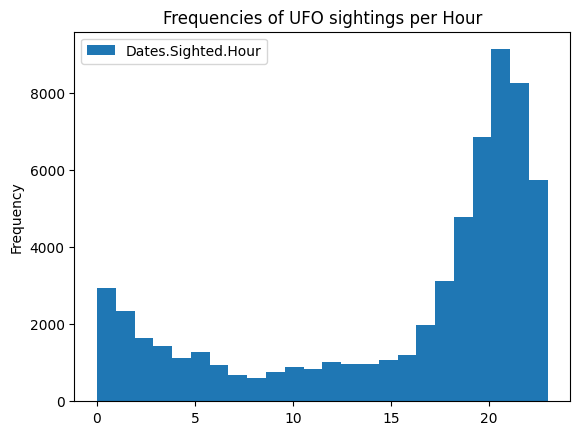

In [6]:
df.plot.hist(y='Dates.Sighted.Hour',title='Frequencies of UFO sightings per Hour', bins=24)

<Axes: title={'center': 'Frequencies of UFO Sightings per Year'}, ylabel='Frequency'>

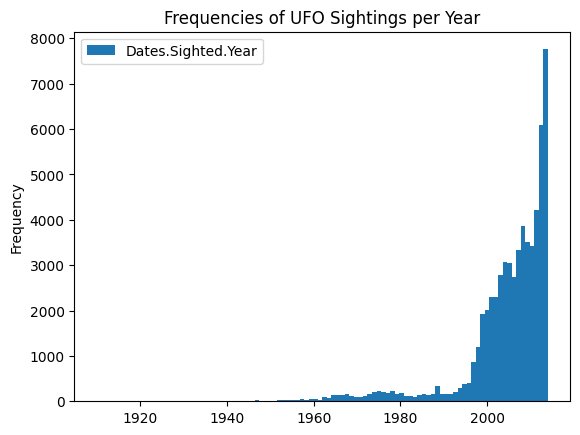

In [7]:
df.plot.hist(y='Dates.Sighted.Year', title='Frequencies of UFO Sightings per Year', bins=100)

Text(0.5, 1.0, 'Top 15 Cities with UFO Sightings')

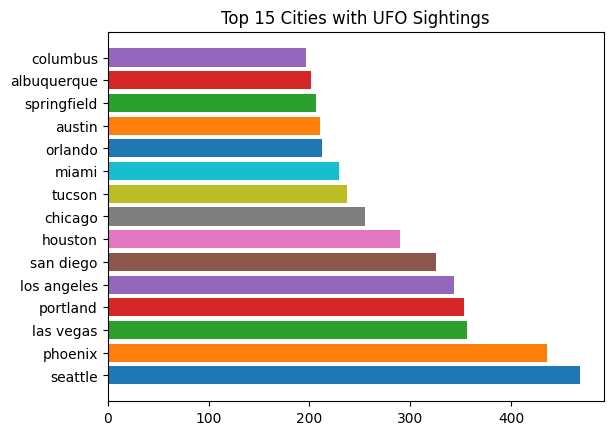

In [8]:
city=df['Location.City']
top15city=nltk.FreqDist(city).most_common(15)
top15city

for x,y in top15city:
    plt.barh(x,y)

plt.title("Top 15 Cities with UFO Sightings")

Text(0.5, 1.0, 'Top 15 UFO Shape Sightings')

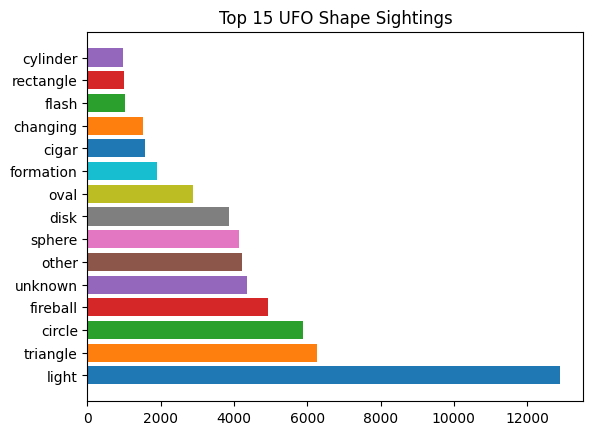

In [9]:
shape=df['Data.Shape']
top15shapes=nltk.FreqDist(shape).most_common(15)
top15shapes

for x,y in top15shapes:
    plt.barh(x,y)

plt.title("Top 15 UFO Shape Sightings")

# Results

# Discussion